# YOLOv8 Barcode Training


## Custom Training to get EAN13/UPC detection working

Dataset is on Roboflow https://universe.roboflow.com/labeler-projects/barcodes-zmxjq/

In [4]:
import os
os.environ["ROBOFLOW_API_KEY"] = "YOUR_API"

In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time



def evaluate_model(model, image_path = "../samples/upc/20240918_075731.jpg"):
    # image_path = "../samples/counter_groceries_1.jpg"
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform YOLOv8 detection
    start_time = time.time()
    results = model(image_rgb, conf=.5)
    end_time = time.time()
    
    print(f"Execution time: {end_time - start_time} seconds")

    for result in results:
        # Get bounding boxes, labels, and confidences
        boxes = result.boxes.xyxy  # xyxy format bounding boxes
        confidences = result.boxes.conf
        class_ids = result.boxes.cls
        
        # Plot image
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(image_rgb)
        plt.title(f"Model: {model.model_name}")
        plt.axis('off')
        
        # Loop over each detection
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)  # Convert to integer
            confidence = confidences[i]
            class_id = int(class_ids[i])
            class_name = model.names[int(class_ids[i])]

            
            # Draw bounding box
            ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            
            # Add label with confidence
            ax.text(x1, y1 - 10, f"{class_name} {confidence:.2f}", color='red', fontsize=12, backgroundcolor='white')
        
        plt.show()


0: 640x480 1 person, 1 bottle, 96.7ms
Speed: 4.1ms preprocess, 96.7ms inference, 73.2ms postprocess per image at shape (1, 3, 640, 480)
Execution time: 1.6990609169006348 seconds


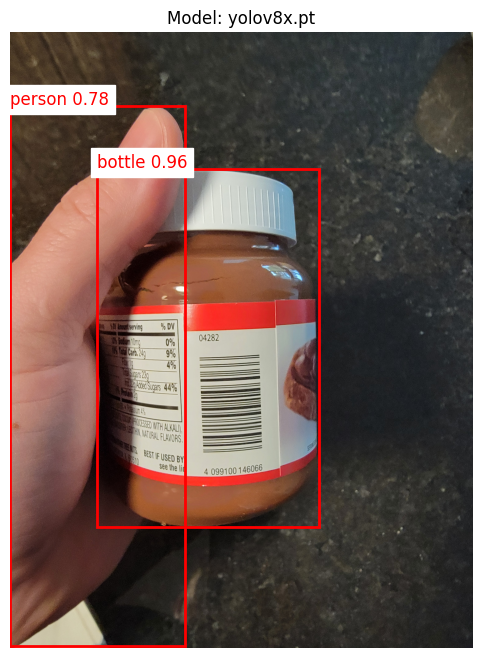

In [2]:
version = 'yolov8x'
model = YOLO(f'{version}.pt')
evaluate_model(model)

# Train Barcode Model

https://universe.roboflow.com/labeler-projects/barcodes-zmxjq/


In [5]:
# Download dataset
%pip install -q roboflow

from roboflow import Roboflow
import os

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("labeler-projects").project("barcodes-zmxjq")
version = project.version(5)
dataset = version.download("yolov8")
dataset.location

Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.95, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Barcodes-5 in yolov8:: 100%|██████████| 63032/63032 [00:04<00:00, 14207.71it/s]


'/home/matt/src/shelfaware/dev_notebooks/Barcodes-5'

In [7]:

from ultralytics import YOLO

# Load a model
model_receipts = YOLO("yolov8x.pt")  # load a pretrained model (recommended for training)

# Train the model
# results = model.train(epochs=50, pretrained=True, iou=0.5, visualize=True, patience=0)  # train the model
train_kwargs = dict(
    # resume=True,
    # data="ReceiptExtractor.v3i.yolov8/data.yaml",
    data="Barcodes-5.yaml",
    epochs=50,
    # epochs=100,
    imgsz=640,
    # cache='disk', # This results in 100s GB of images as npy files
    # pretrained=True,
    # batch=16,
    # device=[0, 1],
    # visualize=True,
    # patience=0,
)
results_sku_train = model_receipts.train(**train_kwargs)

results_sku_train


New https://pypi.org/project/ultralytics/8.2.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.95 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=Barcodes-5.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train37, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
train: Scanning /home/matt/src/shelfaware/dev_notebooks/Barcodes-5/train/labels... 28696 images, 459 backgrounds, 0 corrupt: 100%|██████████| 28696/28696 [00:09<00:00, 3173.24it/s]


train: New cache created: /home/matt/src/shelfaware/dev_notebooks/Barcodes-5/train/labels.cache


val: Scanning /home/matt/src/shelfaware/dev_notebooks/Barcodes-5/valid/labels... 2382 images, 46 backgrounds, 0 corrupt: 100%|██████████| 2382/2382 [00:00<00:00, 2864.81it/s]


val: New cache created: /home/matt/src/shelfaware/dev_notebooks/Barcodes-5/valid/labels.cache
Plotting labels to runs/detect/train37/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 3 dataloader workers
Logging results to runs/detect/train37
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.8G      1.217     0.9639      1.561         22        640: 100%|██████████| 1794/1794 [07:43<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/75 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:16<00:00,  4.68it/s]

                   all       2382       2477      0.808      0.854      0.842      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.5G      1.155     0.7079      1.464         18        640: 100%|██████████| 1794/1794 [07:31<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.816      0.869      0.842      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.2G      1.198     0.7828      1.518         20        640: 100%|██████████| 1794/1794 [07:27<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.72it/s]

                   all       2382       2477      0.741      0.859      0.837      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.5G        1.2     0.7907      1.551         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.821      0.857      0.856      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.5G      1.139      0.715       1.49         30        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.829      0.896       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.5G      1.095     0.6716      1.462         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.861      0.885      0.876      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.5G      1.068      0.637      1.428         14        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.858      0.911      0.893      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.5G      1.048     0.6197      1.419         19        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477       0.85      0.917      0.878        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.5G      1.028     0.6012      1.407         19        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.861      0.922       0.89      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.5G      1.007     0.5783      1.405         15        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.846      0.923      0.897      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.5G     0.9938     0.5709      1.379         14        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.837      0.931       0.89      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.5G     0.9802     0.5573      1.364         16        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.856       0.91      0.893       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.5G     0.9648     0.5467      1.351         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.856      0.928      0.897       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.5G     0.9558     0.5383      1.366         12        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.865      0.916      0.906      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.5G      0.946     0.5298      1.347         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.871      0.919      0.909      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.5G     0.9361     0.5218      1.335         12        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.865      0.925      0.901      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.5G     0.9212     0.5149      1.339         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.861      0.923      0.899      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.5G     0.9214     0.5127      1.329         20        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.856      0.933      0.908      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.5G     0.9075        0.5      1.313         22        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.881      0.908      0.908      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.5G     0.8977     0.4983      1.318         16        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.871      0.911      0.909      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.5G      0.893     0.4922      1.301         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.868      0.924      0.908      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.5G     0.8832     0.4824      1.297         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.869      0.912       0.91      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.5G     0.8776     0.4766      1.304         16        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.869      0.922      0.916       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.5G     0.8666     0.4726      1.289         22        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.872      0.923      0.915      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.5G     0.8618      0.466      1.285         15        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.77it/s]

                   all       2382       2477      0.873      0.924      0.916      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.5G     0.8558     0.4619      1.281         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.71it/s]

                   all       2382       2477      0.874      0.925      0.916      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.5G     0.8433     0.4578      1.278         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.874       0.93      0.917      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.5G     0.8403     0.4523      1.263         22        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.77it/s]

                   all       2382       2477      0.877      0.931      0.915      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.5G     0.8316     0.4478      1.248         13        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.877       0.93      0.915       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.5G     0.8253     0.4434      1.227         13        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.875       0.93      0.917      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.5G      0.818     0.4337      1.248         24        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.879      0.926      0.921      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.5G     0.8067     0.4301      1.238         25        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.879      0.925       0.92      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.5G     0.8007     0.4279      1.251         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.878      0.927      0.919      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.5G     0.7971     0.4225       1.25         11        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.882      0.925      0.918      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.5G     0.7883      0.416      1.247         15        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.881      0.925      0.919      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.5G     0.7811     0.4128      1.229         29        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.883      0.925       0.92      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.5G     0.7709     0.4029      1.217         17        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.881      0.926      0.919      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.5G     0.7689     0.3994      1.216         18        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]

                   all       2382       2477      0.886      0.924      0.919      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.5G     0.7621     0.3981      1.216         13        640: 100%|██████████| 1794/1794 [07:26<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.889      0.922      0.919      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.5G     0.7491      0.389      1.204         19        640: 100%|██████████| 1794/1794 [07:26<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.884      0.928      0.919      0.665


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.5G     0.7494     0.3274      1.211          7        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.882       0.93      0.921      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.5G     0.7312     0.3219      1.184          8        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.883      0.929       0.92      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.5G      0.723     0.3153      1.184          7        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477      0.888      0.922      0.921      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.5G     0.7105     0.3102      1.176          8        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.77it/s]

                   all       2382       2477      0.888      0.925      0.921       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.5G     0.6982     0.3017      1.169          8        640: 100%|██████████| 1794/1794 [07:24<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.889      0.924      0.922      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.5G     0.6872     0.2967      1.162          8        640: 100%|██████████| 1794/1794 [07:24<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.76it/s]

                   all       2382       2477      0.888       0.92      0.922      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.5G     0.6797     0.2897      1.153          9        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.888      0.921      0.922      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.5G      0.672     0.2845      1.145         11        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]

                   all       2382       2477       0.89      0.921      0.921      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.5G     0.6621     0.2795      1.145          8        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.888      0.921      0.921      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.5G     0.6547     0.2757      1.142          8        640: 100%|██████████| 1794/1794 [07:25<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]

                   all       2382       2477      0.888      0.922      0.921      0.674



50 epochs completed in 6.433 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 136.7MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics YOLOv8.2.95 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:15<00:00,  4.72it/s]


                   all       2382       2477      0.888      0.922      0.921      0.674
               Barcode       2135       2194       0.96      0.965      0.977      0.709
               QR Code        219        283      0.816      0.879      0.866      0.639
Speed: 0.5ms preprocess, 4.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train37


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d53cb760b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Evaluate


0: 640x480 1 Barcode, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Execution time: 0.5964899063110352 seconds


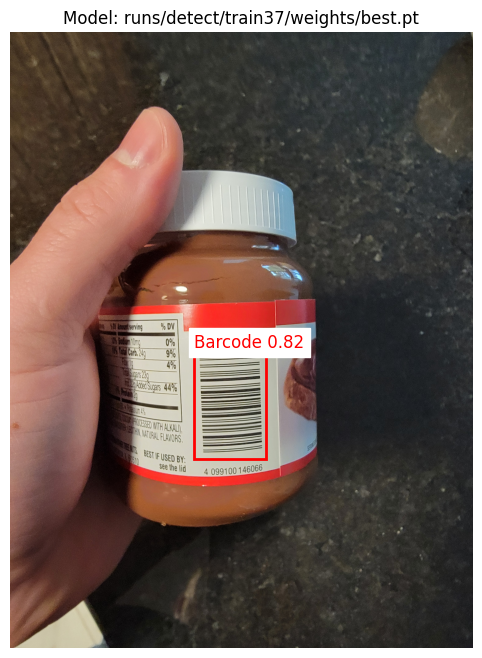


0: 640x480 1 Barcode, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Execution time: 0.013312578201293945 seconds


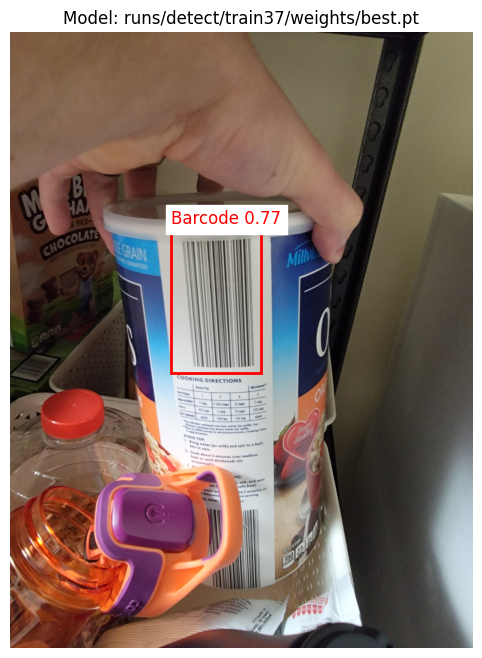


0: 480x640 1 Barcode, 98.6ms
Speed: 2.4ms preprocess, 98.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
Execution time: 0.10503602027893066 seconds


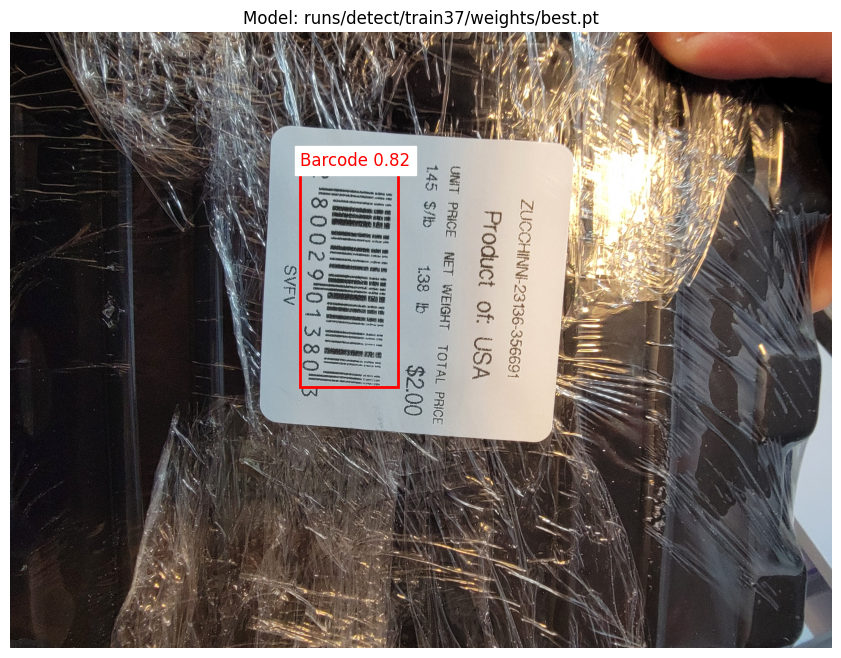


0: 640x480 1 Barcode, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Execution time: 0.01343083381652832 seconds


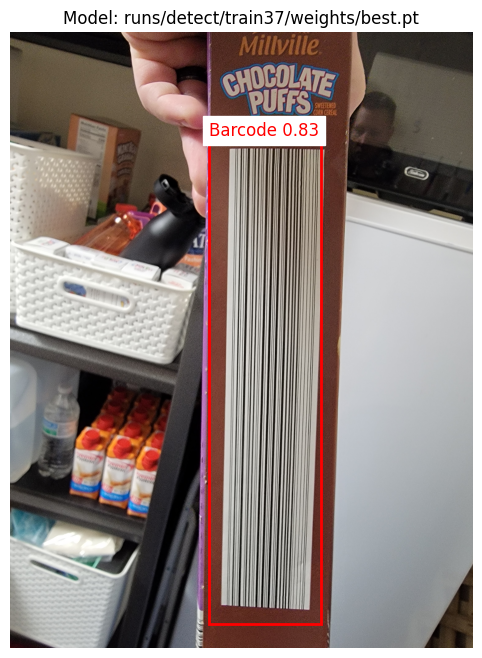

In [3]:
# overlay_boxes(results_sku_train)
# model_sku_detect_last = YOLO("runs/detect/train27/weights/last.pt")

# results_sku = model_sku_detect_last(image_rgb)
# model_receipts(image_rgb)

# model = YOLO(f'{version}.pt')
model_receipts_last = YOLO("runs/detect/train37/weights/best.pt")
evaluate_model(model_receipts_last)
evaluate_model(model_receipts_last, "../samples/upc/20240918_075942.jpg")
evaluate_model(model_receipts_last, "../samples/upc/20240918_075752.jpg")
evaluate_model(model_receipts_last, "../samples/upc/20240918_075933.jpg")